In [ ]:
import pickle
from rdkit import Chem
import pandas as pd
import os
import pprint

# Load example data

Example of 1 peptide

In [28]:
peptide = "A.3-pyridylethyl_Gly.meL.Nle.dP.Bn(4-Cl)_Gly"
pickle_file_path = f"data/pickle/{peptide}.pickle"
permeability_path = "data/permeability.csv"

with open(pickle_file_path, "rb") as f:
    data = pickle.load(f)

permeability_df = pd.read_csv(permeability_path)

#### Stats

In [ ]:
folder_path = "data/pickle/"
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print(f"Number of pickle files: {file_count}")
print(f"Number of macrocyclic peptide: {permeability_df.shape[0]}")

Number of files: 3258
Number of macrocyclic peptide: 3258


#### Data Structure

In [35]:
pprint.pprint(data, depth=3)

{'charge': 0,
 'conformers': [{'boltzmannweight': 0.30162,
                 'conformerweights': [...],
                 'degeneracy': 147,
                 'relativeenergy': 0.0,
                 'set': 1,
                 'totalenergy': -160.74811107},
                {'boltzmannweight': 0.01805,
                 'conformerweights': [...],
                 'degeneracy': 9,
                 'relativeenergy': 0.01,
                 'set': 2,
                 'totalenergy': -160.74809466},
                {'boltzmannweight': 0.0254,
                 'conformerweights': [...],
                 'degeneracy': 13,
                 'relativeenergy': 0.025,
                 'set': 3,
                 'totalenergy': -160.74807116},
                {'boltzmannweight': 0.01302,
                 'conformerweights': [...],
                 'degeneracy': 7,
                 'relativeenergy': 0.051,
                 'set': 4,
                 'totalenergy': -160.74802984},
                {'boltzmann

In [23]:
print(" keys:", list(data.keys()))

 keys: ['lowestenergy', 'totalconfs', 'temperature', 'ensembleenergy', 'ensembleentropy', 'ensemblefreeenergy', 'poplowestpct', 'uniqueconfs', 'conformers', 'smiles', 'rd_mol', 'charge']


# Get permeablity (logP) given SMILES

In [31]:
smiles = data.get("smiles")
logP = permeability_df.query("smiles == @smiles")['permeability'].values
print(f"Permeability value for peptide {peptide} is {logP}")

Permeability value for peptide A.3-pyridylethyl_Gly.meL.Nle.dP.Bn(4-Cl)_Gly is [-5.65]


# Others

In [36]:
permeability_df["num_monomers"].value_counts()

num_monomers
7     1732
6     1511
10      15
Name: count, dtype: int64

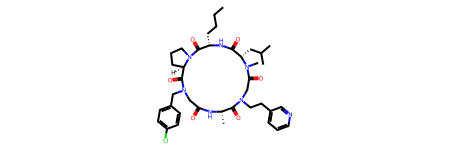

In [33]:
Chem.MolFromSmiles(smiles)

In [32]:
data.get("rd_mol", None)